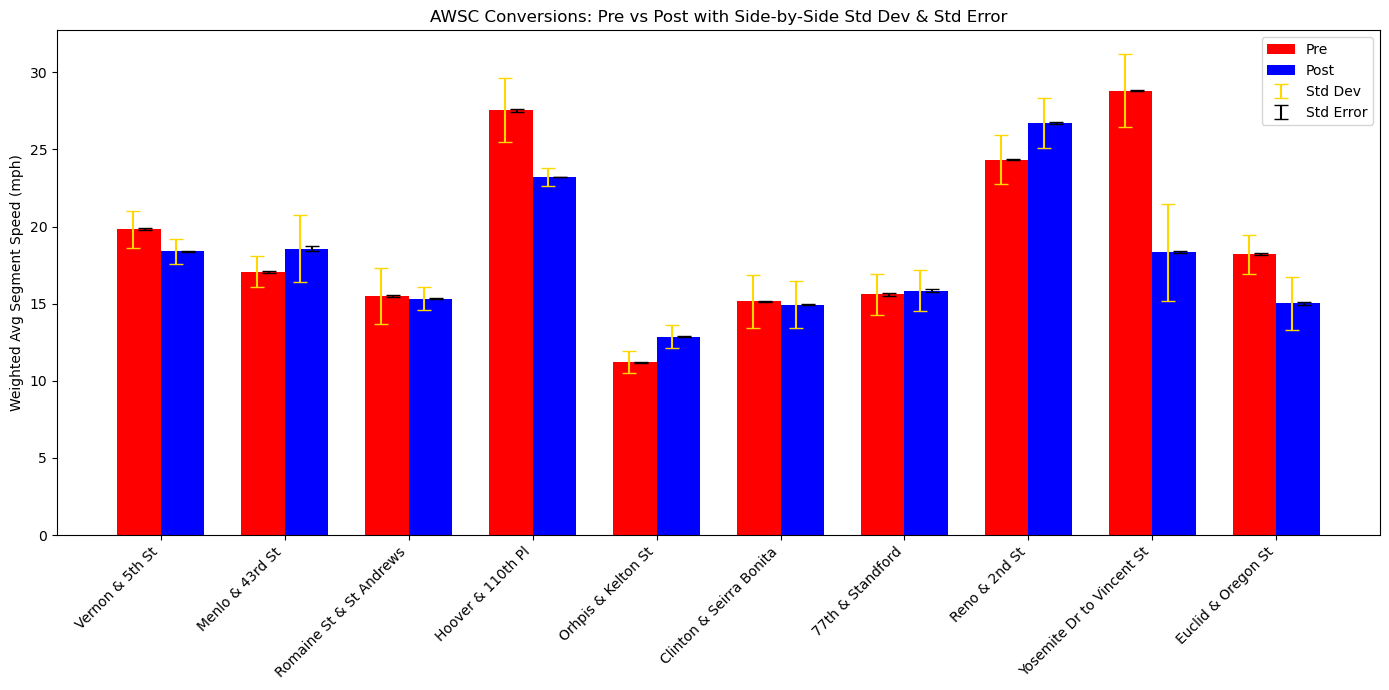

In [4]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Load your summary files
summary_dir = 'results'
summaries = []

for filename in os.listdir(summary_dir):
    if filename.endswith('_summary.json'):
        with open(os.path.join(summary_dir, filename), 'r') as f:
            summaries.append(json.load(f))

# Extract values
labels = [s['Intersection'] for s in summaries]
pre_means = [s['Pre_Mean'] for s in summaries]
post_means = [s['Post_Mean'] for s in summaries]
pre_stds = [s['Pre_Std'] for s in summaries]
post_stds = [s['Post_Std'] for s in summaries]
pre_ses = [s['Pre_SE'] for s in summaries]
post_ses = [s['Post_SE'] for s in summaries]

x = np.arange(len(labels))
width = 0.35
offset = 0.05  # Shift for side-by-side error bars

fig, ax = plt.subplots(figsize=(14, 7))

# Plot main bars
pre_bars = ax.bar(x - width/2, pre_means, width, label='Pre', color='red')
post_bars = ax.bar(x + width/2, post_means, width, label='Post', color='blue')

# Std Dev (yellow) and Std Error (black), with horizontal offset
ax.errorbar(x - width/2 - offset, pre_means, yerr=pre_stds, fmt='none', ecolor='gold', capsize=5, label='Std Dev')
ax.errorbar(x - width/2 + offset, pre_means, yerr=pre_ses, fmt='none', ecolor='black', capsize=5, label='Std Error')

ax.errorbar(x + width/2 - offset, post_means, yerr=post_stds, fmt='none', ecolor='gold', capsize=5)
ax.errorbar(x + width/2 + offset, post_means, yerr=post_ses, fmt='none', ecolor='black', capsize=5)

# Formatting
ax.set_ylabel('Weighted Avg Segment Speed (mph)')
ax.set_title('AWSC Conversions: Pre vs Post with Side-by-Side Std Dev & Std Error')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


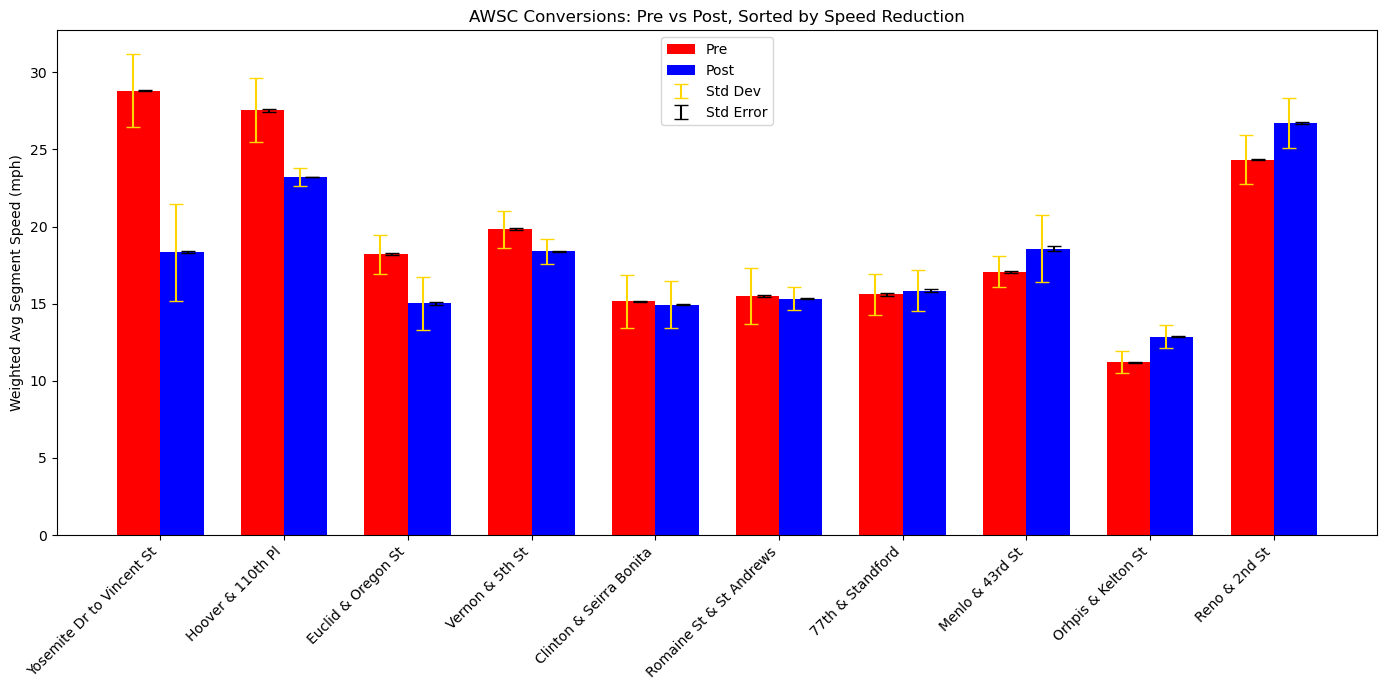

In [5]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Load summary files
summary_dir = 'results'
summaries = []

for filename in os.listdir(summary_dir):
    if filename.endswith('_summary.json'):
        with open(os.path.join(summary_dir, filename), 'r') as f:
            data = json.load(f)
            data['Speed_Diff'] = data['Pre_Mean'] - data['Post_Mean']  # calculate speed drop
            summaries.append(data)

# Sort summaries by speed difference (descending)
summaries.sort(key=lambda s: s['Speed_Diff'], reverse=True)

# Extract values in sorted order
labels = [s['Intersection'] for s in summaries]
pre_means = [s['Pre_Mean'] for s in summaries]
post_means = [s['Post_Mean'] for s in summaries]
pre_stds = [s['Pre_Std'] for s in summaries]
post_stds = [s['Post_Std'] for s in summaries]
pre_ses = [s['Pre_SE'] for s in summaries]
post_ses = [s['Post_SE'] for s in summaries]

# Bar plot setup
x = np.arange(len(labels))
width = 0.35
offset = 0.05

fig, ax = plt.subplots(figsize=(14, 7))

# Main bars
ax.bar(x - width/2, pre_means, width, label='Pre', color='red')
ax.bar(x + width/2, post_means, width, label='Post', color='blue')

# Std Dev (gold) and Std Error (black)
ax.errorbar(x - width/2 - offset, pre_means, yerr=pre_stds, fmt='none', ecolor='gold', capsize=5, label='Std Dev')
ax.errorbar(x - width/2 + offset, pre_means, yerr=pre_ses, fmt='none', ecolor='black', capsize=5, label='Std Error')
ax.errorbar(x + width/2 - offset, post_means, yerr=post_stds, fmt='none', ecolor='gold', capsize=5)
ax.errorbar(x + width/2 + offset, post_means, yerr=post_ses, fmt='none', ecolor='black', capsize=5)

# Formatting
ax.set_ylabel('Weighted Avg Segment Speed (mph)')
ax.set_title('AWSC Conversions: Pre vs Post, Sorted by Speed Reduction')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.savefig('awsc_speed_comparison.png', dpi=300)
plt.show()


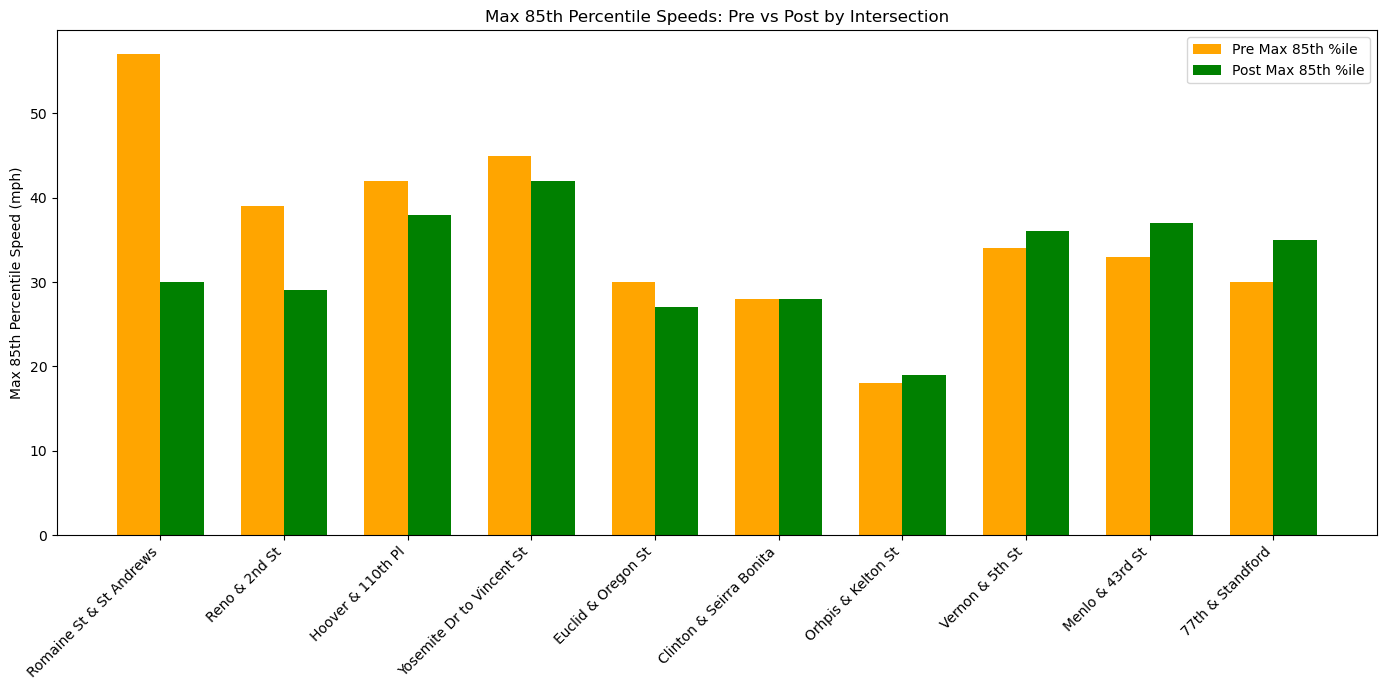

In [6]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Directory with your JSON summary files
summary_dir = 'results'
summaries = []

# Load and filter valid JSONs with 85th max values
for filename in os.listdir(summary_dir):
    if filename.endswith('_summary.json'):
        with open(os.path.join(summary_dir, filename), 'r') as f:
            data = json.load(f)
            if 'Pre_Max_85th' in data and 'Post_Max_85th' in data:
                data['Speed_Diff'] = data['Pre_Max_85th'] - data['Post_Max_85th']
                summaries.append(data)

# Sort by the amount of speed reduction
summaries.sort(key=lambda s: s['Speed_Diff'], reverse=True)

# Extract sorted data
labels = [s['Intersection'] for s in summaries]
pre_max_85ths = [s['Pre_Max_85th'] for s in summaries]
post_max_85ths = [s['Post_Max_85th'] for s in summaries]

x = np.arange(len(labels))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(x - width/2, pre_max_85ths, width, label='Pre Max 85th %ile', color='orange')
ax.bar(x + width/2, post_max_85ths, width, label='Post Max 85th %ile', color='green')

# Formatting
ax.set_ylabel('Max 85th Percentile Speed (mph)')
ax.set_title('Max 85th Percentile Speeds: Pre vs Post by Intersection')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.savefig('max_85th_percentile_comparison.png', dpi=300)
plt.show()


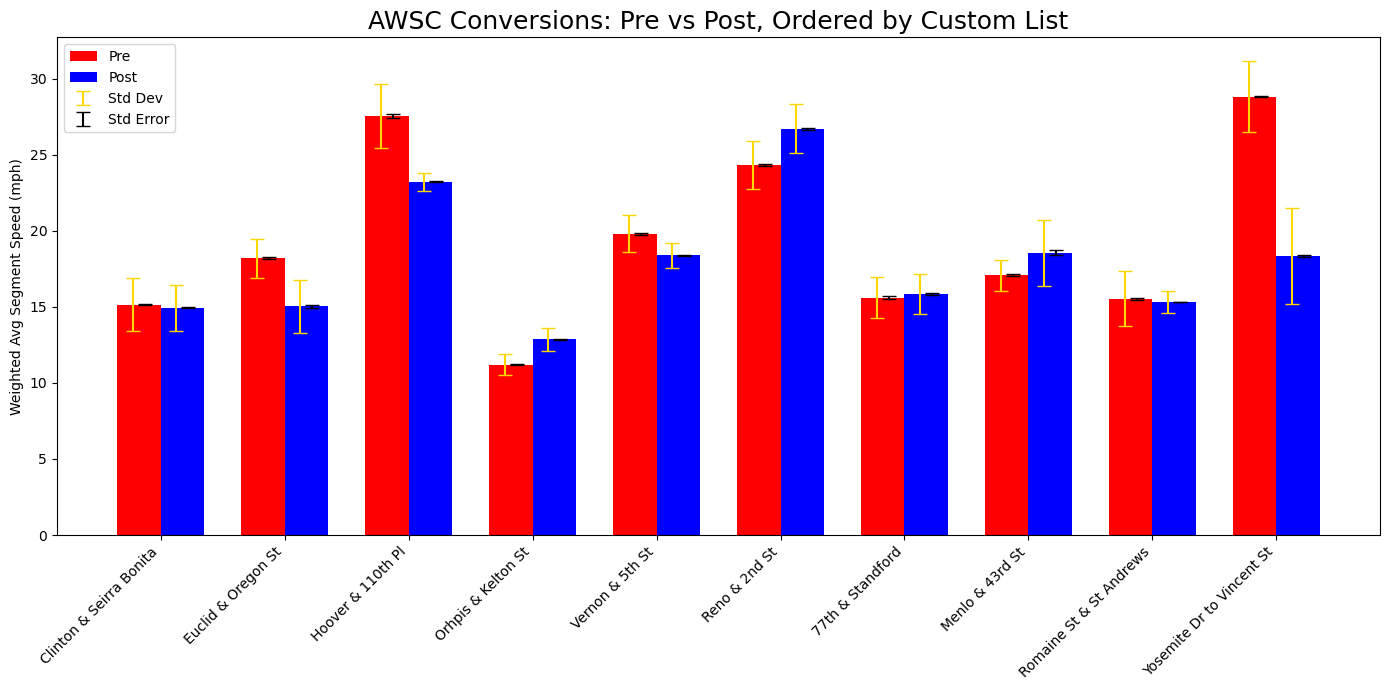

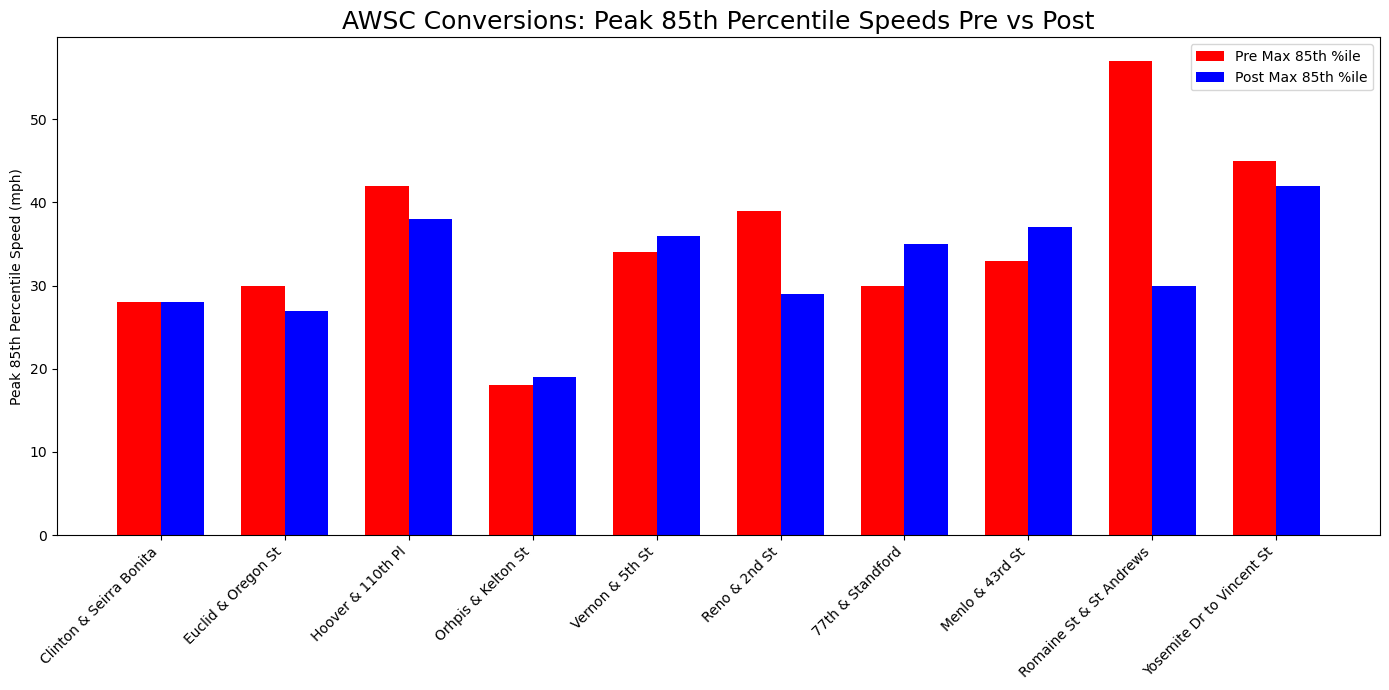

In [9]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Ordered list of intersections
ordered_labels = [
    "Clinton & Seirra Bonita",
    "Euclid & Oregon St",
    "Hoover & 110th Pl",
    "Orhpis & Kelton St",
    "Vernon & 5th St",
    "Reno & 2nd St",
    "77th & Standford",
    "Menlo & 43rd St",
    "Romaine St & St Andrews",
    "Yosemite Dr to Vincent St"
]

# Load data from summary files
summary_dir = 'results'
summary_dict = {}

for filename in os.listdir(summary_dir):
    if filename.endswith('_summary.json'):
        with open(os.path.join(summary_dir, filename), 'r') as f:
            data = json.load(f)
            summary_dict[data['Intersection']] = data

# Filter labels to those found in the data
labels = [label for label in ordered_labels if label in summary_dict]
x = np.arange(len(labels))
width = 0.35
offset = 0.05

# === Chart 1: Mean Speed Comparison with SD and SE ===
pre_means = [summary_dict[label]['Pre_Mean'] for label in labels]
post_means = [summary_dict[label]['Post_Mean'] for label in labels]
pre_stds = [summary_dict[label]['Pre_Std'] for label in labels]
post_stds = [summary_dict[label]['Post_Std'] for label in labels]
pre_ses = [summary_dict[label]['Pre_SE'] for label in labels]
post_ses = [summary_dict[label]['Post_SE'] for label in labels]

fig1, ax1 = plt.subplots(figsize=(14, 7))
ax1.bar(x - width/2, pre_means, width, label='Pre', color='red')
ax1.bar(x + width/2, post_means, width, label='Post', color='blue')

# Add error bars (SD and SE)
ax1.errorbar(x - width/2 - offset, pre_means, yerr=pre_stds, fmt='none', ecolor='gold', capsize=5, label='Std Dev')
ax1.errorbar(x - width/2 + offset, pre_means, yerr=pre_ses, fmt='none', ecolor='black', capsize=5, label='Std Error')
ax1.errorbar(x + width/2 - offset, post_means, yerr=post_stds, fmt='none', ecolor='gold', capsize=5)
ax1.errorbar(x + width/2 + offset, post_means, yerr=post_ses, fmt='none', ecolor='black', capsize=5)

# Format chart
ax1.set_ylabel('Weighted Avg Segment Speed (mph)')
ax1.set_title('AWSC Conversions: Pre vs Post, Ordered by Custom List', fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.legend()
plt.tight_layout()
plt.savefig('awsc_speed_comparison.png', dpi=300)
plt.show()


# === Chart 2: Max 85th Percentile Speed Comparison ===
pre_max_85ths = [summary_dict[label]['Pre_Max_85th'] for label in labels]
post_max_85ths = [summary_dict[label]['Post_Max_85th'] for label in labels]

fig2, ax2 = plt.subplots(figsize=(14, 7))
ax2.bar(x - width/2, pre_max_85ths, width, label='Pre Max 85th %ile', color='red')
ax2.bar(x + width/2, post_max_85ths, width, label='Post Max 85th %ile', color='blue')

# Format chart
ax2.set_ylabel('Peak 85th Percentile Speed (mph)')
ax2.set_title('AWSC Conversions: Peak 85th Percentile Speeds Pre vs Post', fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.legend()
plt.tight_layout()
plt.savefig('awsc_max_85th_comparison.png', dpi=300)
plt.show()
